# Weights

In this notebook we demonstrate all of NetCDF-SCM's known weightings. These weights are used when taking area overages for different SCM boxes e.g. the ocean/land boxes or the El Nino box. Here we show the "last resort" weights. However, if land surface fraction data is available then that is used to do land/ocean weighting rather than the defaults.

We show the default weights, all our inbuilt weights and finally how the user can define their own custom weights.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
from os.path import join
    
import numpy as np
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt

from netcdf_scm.iris_cube_wrappers import MarbleCMIP5Cube
from netcdf_scm.weights import get_weights_for_area, WEIGHTS_FUNCTIONS_WITHOUT_AREA_WEIGHTING

<IPython.core.display.Javascript object>

In [2]:
plt.style.use('bmh') 
%matplotlib inline

## Data path

Here we use our test data.

In [3]:
DATA_PATH_TEST = join("..", "tests", "test-data")
DATA_PATH_TEST_MARBLE_CMIP5_ROOT = join(DATA_PATH_TEST, "marble-cmip5")

## Load the cube

In [4]:
tas = MarbleCMIP5Cube()
tas.load_data_from_identifiers(
    root_dir=DATA_PATH_TEST_MARBLE_CMIP5_ROOT,
    activity="cmip5",
    experiment="1pctCO2",
    mip_table="Amon",
    variable_name="tas",
    model="CanESM2",
    ensemble_member="r1i1p1",
    time_period="189201-190312",
    file_ext=".nc",
)

## Weights

### Default weights

By default, only land/ocean and hemispheric weights are considered.

In [5]:
default_weights = tas.get_scm_timeseries_weights()

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


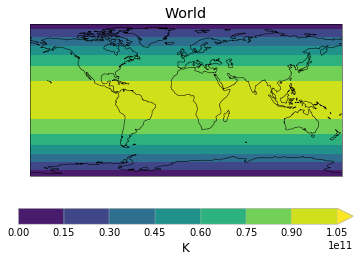

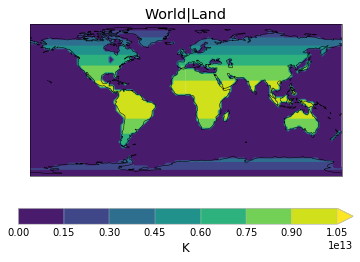

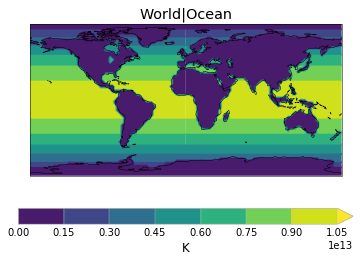

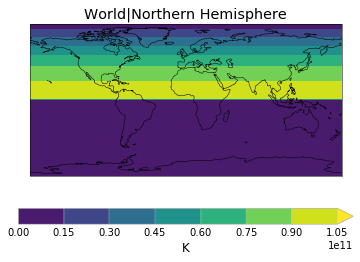

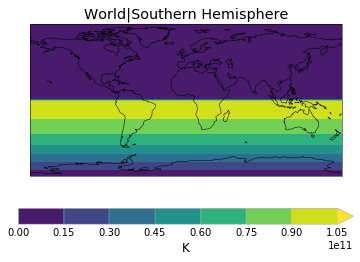

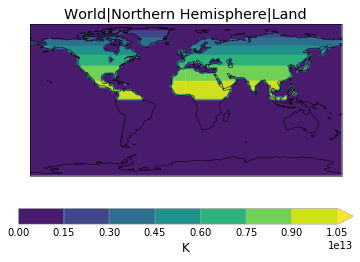

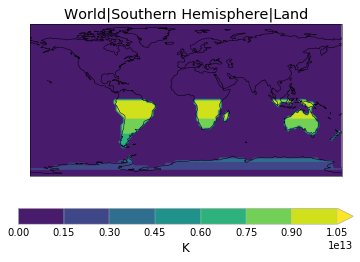

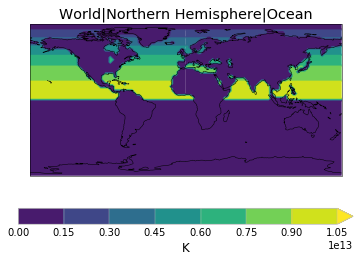

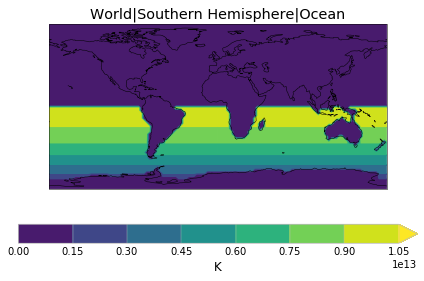

In [6]:
# NBVAL_IGNORE_OUTPUT
def plot_weights(weights_to_plot):
    for i, (label, weights) in enumerate(weights_to_plot.items()):
        ax = plt.figure().add_subplot(111)
    
        
        weight_cube = tas.cube.collapsed("time", iris.analysis.MEAN)
        weight_cube.data = weights
        qplt.contourf(
            weight_cube, 
            extend='max',
        )
        
        plt.title(label)
        plt.gca().coastlines()


    plt.tight_layout()
    
plot_weights(default_weights)

### All inbuilt masks

The default masks do not contain all inbuilt masks. We can use all available inbuilt masks instead.

In [7]:
all_inbuilt_weights = tas.get_scm_timeseries_weights(regions=WEIGHTS_FUNCTIONS_WITHOUT_AREA_WEIGHTING.keys())

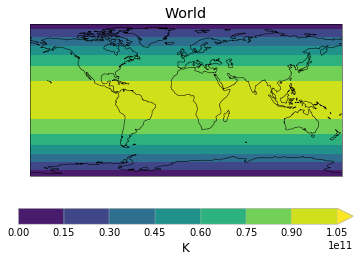

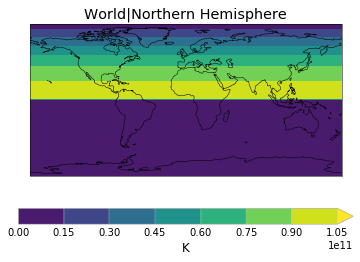

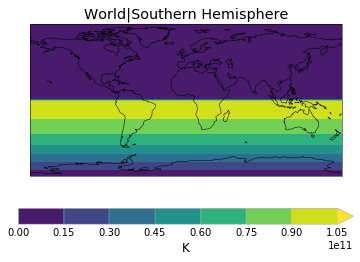

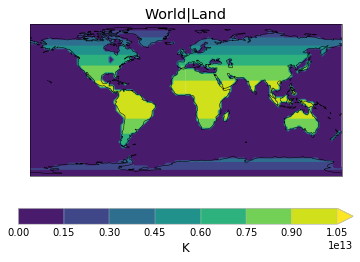

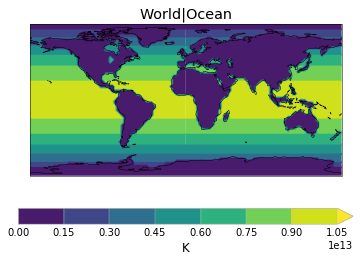

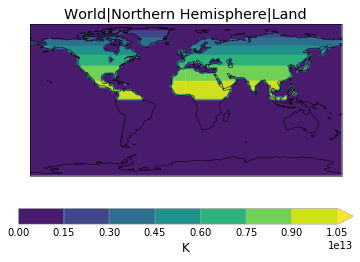

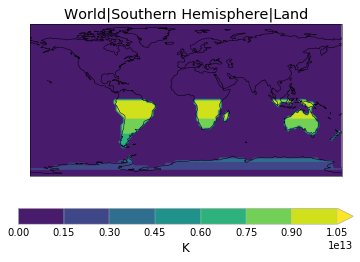

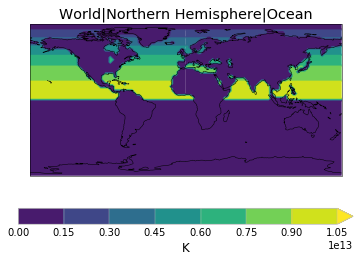

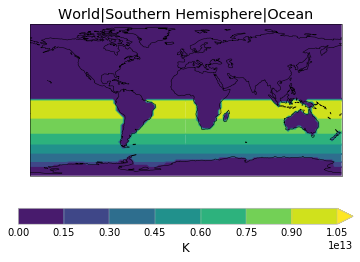

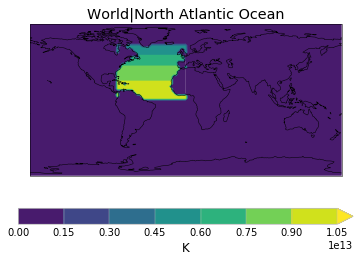

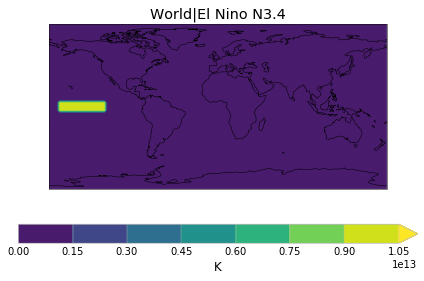

In [8]:
plot_weights(all_inbuilt_weights)

### User-defined masks

As a user, you can also define masks. Simply add them to `netcdf_scm.masks.MASKS` and then use them in your `get_scm_cubes` call.

In [9]:
WEIGHTS_FUNCTIONS_WITHOUT_AREA_WEIGHTING["custom mask"] = get_weights_for_area(
    -60, 100, -10, 330
)
WEIGHTS_FUNCTIONS_WITHOUT_AREA_WEIGHTING[
    "Northern Atlantic area bounds"
] = get_weights_for_area(0, -80, 65, 0)

In [10]:
custom_weights = tas.get_scm_timeseries_weights(regions=[
    "World|El Nino N3.4", "custom mask", "World|Land", "Northern Atlantic area bounds"
])

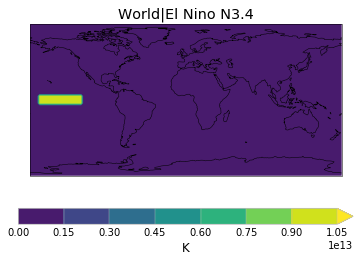

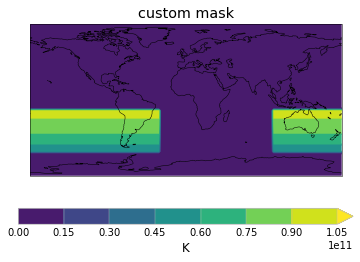

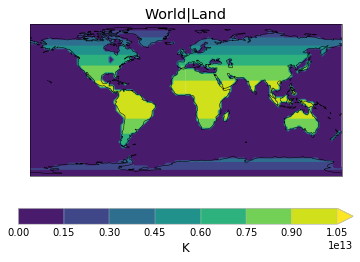

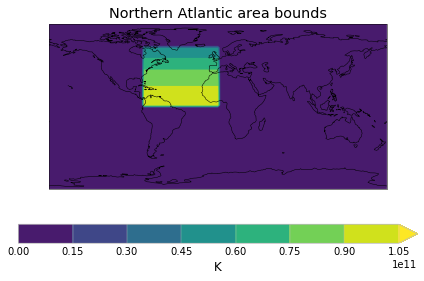

In [11]:
plot_weights(custom_weights)